50
Execution time of _full_qtf_6dof: 0.0060


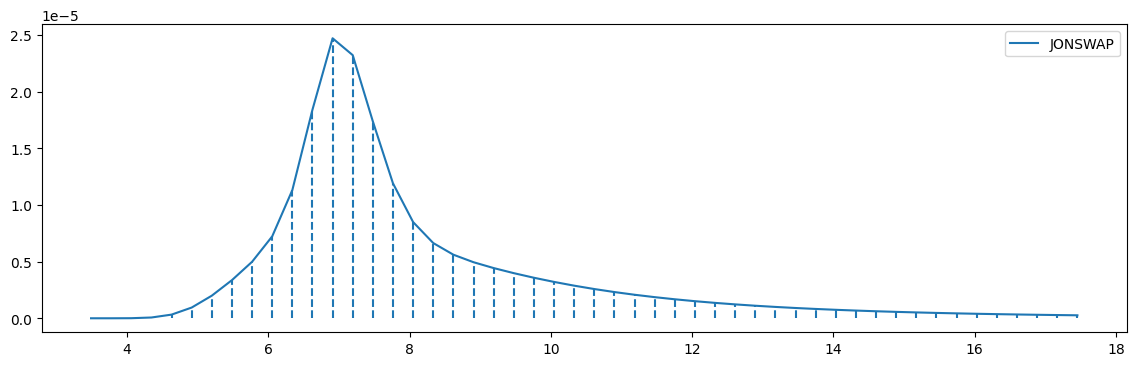

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import utils

plt.rcParams.update({
    'figure.figsize': (12, 4),
    'font.size': 10,
    'lines.linewidth': 1.5
})

from simulator.csad import CSAD_DP_6DOF

from waves import wave_loads, wave_spectra

# Set up intial conditions for CSAD MODEL
dt = 0.02
simtime = 60 * 5
t = np.arange(0, simtime, dt)

vessel = CSAD_DP_6DOF(dt)

x = np.zeros((len(t), 12))
eta = np.zeros((len(t), 6))


# Set up environmental loads - waves and current

# CURRENT
Uc = 0.0
betac = 0

# WAVES
hs = 0.03
tp = 0.9
wp = 2*np.pi/tp
gamma = 3.3 # Jonswap spectra is to be used.

wmin = wp/2
wmax = 2.5*wp
N = 50          # Number of wave components

dw = (wmax - wmin)/N

wave_freqs = np.linspace(wmin, wmax, N)


jonswap = wave_spectra.JONSWAP(wave_freqs)
freqs, spectrum = jonswap(hs, tp, gamma=gamma)

wave_amp = np.sqrt(2*spectrum*dw)
phases = np.random.uniform(0, 2*np.pi, size=N)
wave_angle = np.ones(N)*np.deg2rad(100)    # Waves coming from North?

# Now we can pass this to the wave_load module
waveload = wave_loads.WaveLoad(wave_amp, wave_freqs, phases, wave_angle, vessel._config_file)

plt.figure(figsize=(14, 4))
plt.plot(freqs, spectrum, label="JONSWAP")
plt.vlines(x=freqs, ymin=np.zeros(freqs.shape[0]), ymax=spectrum, linestyles="--")
plt.legend()
plt.show()



In [34]:
wave_amp.shape[0]

50

In [35]:
# RUN SIMULATION
tau_env = np.zeros((len(t), 6))
for i in range(1, len(t)):
    # Tau env is the 2nd order wave loads now.
    relative_angle = vessel.get_eta()[-1] - wave_angle[0]
    print(f"{relative_angle:=}")
    tau_env[i] = waveload.second_order_loads(t[i], relative_angle)
    vessel.x_dot(Uc, betac, tau_env[i])
    vessel.integrate()
    eta[i] = vessel.get_eta()
    x[i] = vessel._x

# Convert from rad and rad/s to deg and deg/s
x[:, 3:6] = np.rad2deg(x[:, 3:6])
x[:, 9:] = np.rad2deg(x[:, 9:])

-1.7453292519943295
Indx: 10, Relative angle: 1.7453292519943295
-1.7453292519943295
Indx: 10, Relative angle: 1.7453292519943295
-1.7453292382640602
Indx: 10, Relative angle: 1.7453292519943295
-1.7453292122244466
Indx: 10, Relative angle: 1.7453292519943295
-1.7453291748773074
Indx: 10, Relative angle: 1.7453292519943295
-1.7453291267434923
Indx: 10, Relative angle: 1.7453292519943295
-1.7453290678179598
Indx: 10, Relative angle: 1.7453292519943295
-1.7453289975435895
Indx: 10, Relative angle: 1.7453292519943295
-1.7453289148047937
Indx: 10, Relative angle: 1.7453292519943295
-1.7453288179412139
Indx: 10, Relative angle: 1.7453292519943295
-1.7453287047810042
Indx: 10, Relative angle: 1.7453292519943295
-1.745328572692429
Indx: 10, Relative angle: 1.7453292519943295
-1.7453284186517932
Indx: 10, Relative angle: 1.7453292519943295
-1.7453282393250877
Indx: 10, Relative angle: 1.7453292519943295
-1.7453280311602184
Indx: 10, Relative angle: 1.7453292519943295
-1.7453277904862923
Indx: 

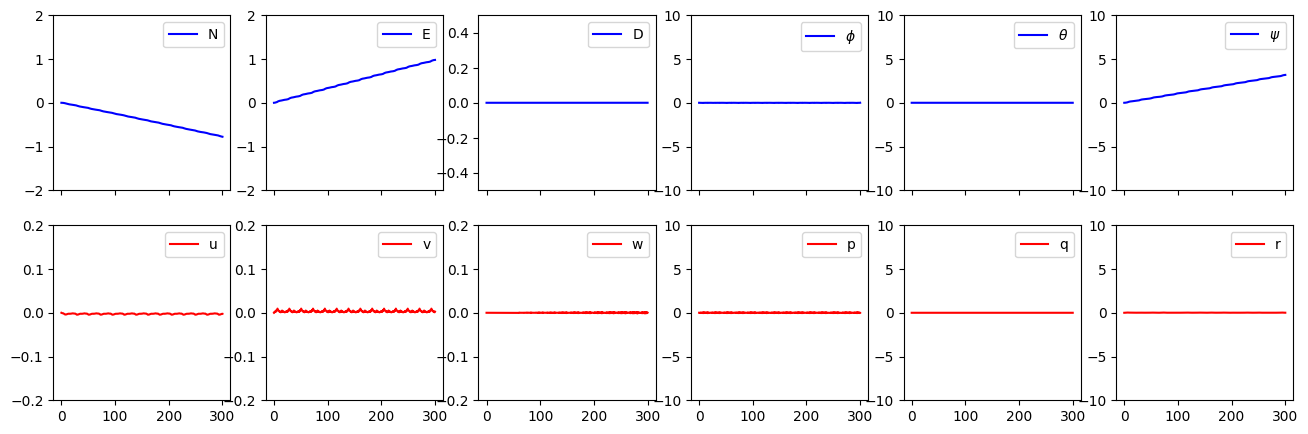

In [36]:
# Plot results
fig, axs = plt.subplots(2, 6, sharex=True, figsize=(16, 5))
labels = ['N', 'E', 'D', r'$\phi$', r"$\theta$", r"$\psi$", "u", "v", "w", 'p', 'q', 'r']
colors = 6*['blue'] + 6*['red']
ylims = [
    (-2, 2),
    (-2, 2),
    (-.5, 0.5),
    (-10, 10),
    (-10, 10),
    (-10, 10),
    (-.2, .2),
    (-.2, .2),
    (-.2, .2),
    (-10, 10),
    (-10, 10),
    (-10, 10),
]
for i in range(12):
    plt.sca(axs[i//6, i - 6*(i//6)])
    plt.plot(t, x[:, i], color=colors[i], label=labels[i])
    plt.ylim(ylims[i])
    plt.legend()

plt.show()

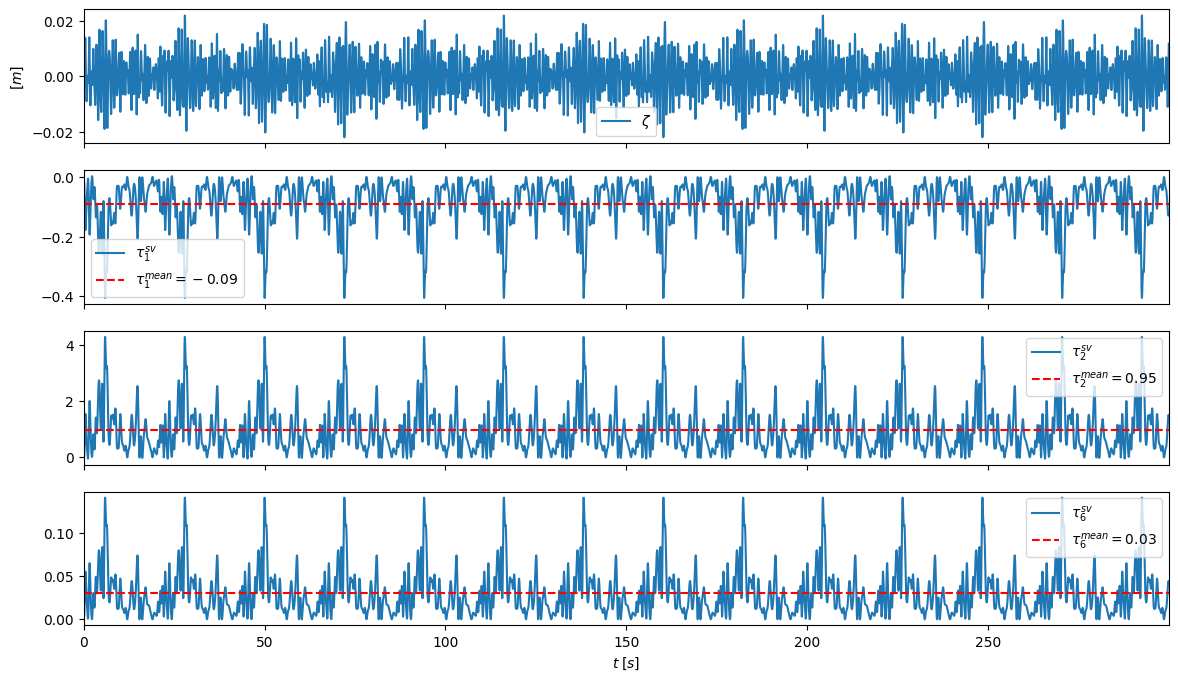

In [53]:
# Plot the slowly varying load for the different DoF
fig, axs = plt.subplots(4, 1, sharex=True, figsize=(14, 8))
c = 1

plt.sca(axs[0])
plt.plot(t, np.sum(wave_amp*np.cos(wave_freqs*t[:, None] + phases), axis=1), label=r"$\zeta$")
plt.ylabel("$[m]$")
plt.legend()
for i in [0, 1, 5]:
    plt.sca(axs[c])
    plt.plot(t, tau_env[:, i], label=r"$\tau_{}^{}$".format(i+1, '{sv}'))
    avg = np.round(np.mean(tau_env[:, i]),2)
    plt.axhline(avg, linestyle="--", color="red", label=r"$\tau_{}^{}={}$".format(i+1, '{mean}', avg))
    plt.legend()
    c += 1

plt.xlabel("$t \; [s]$")
plt.xlim(t[0], t[-1])
plt.show()

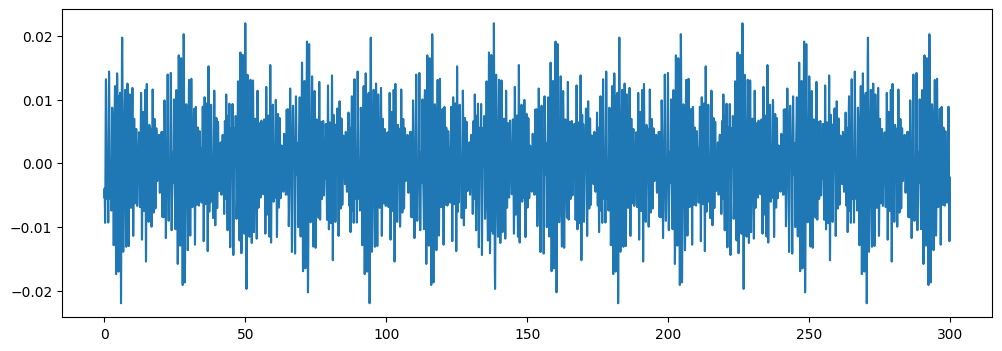

In [48]:
plt.plot(t, np.sum(wave_amp*np.sin(wave_freqs*t[:, None] + phases), axis=1))

In [39]:
print(np.round(vessel._D, 2))

[[ 3.6060e+01  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  2.8259e+02  0.0000e+00  2.3000e+00  0.0000e+00  3.5800e+00]
 [ 0.0000e+00  0.0000e+00  7.3416e+02  0.0000e+00  8.9830e+01  0.0000e+00]
 [ 0.0000e+00  2.3000e+00  0.0000e+00  3.3300e+00  0.0000e+00 -5.2000e-01]
 [ 0.0000e+00  0.0000e+00  8.9830e+01  0.0000e+00  3.5486e+02  0.0000e+00]
 [ 0.0000e+00  3.5800e+00  0.0000e+00 -5.2000e-01  0.0000e+00  9.9110e+01]]


In [40]:
print(np.round(vessel._Dp, 2))

[[ 1.9630e+01  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  1.5382e+02  0.0000e+00  2.3000e+00  0.0000e+00  3.5800e+00]
 [ 0.0000e+00  0.0000e+00  7.3416e+02  0.0000e+00  8.9830e+01  0.0000e+00]
 [ 0.0000e+00  2.3000e+00  0.0000e+00  1.3000e-01  0.0000e+00 -5.2000e-01]
 [ 0.0000e+00  0.0000e+00  8.9830e+01  0.0000e+00  3.5486e+02  0.0000e+00]
 [ 0.0000e+00  3.5800e+00  0.0000e+00 -5.2000e-01  0.0000e+00  4.8600e+01]]


In [41]:
print(f"Natural Frequencies [rad/s]".center(80, '-'))
wn = np.sqrt(vessel._G/vessel._M)
wn[np.isnan(wn)] = 0
print(np.round(wn, 2))
print(f"Natural Period".center(80, '-'))
tn = 2*np.pi/wn
tn[np.isinf(tn)] = 0
print(np.round(tn, 2))

--------------------------Natural Frequencies [rad/s]---------------------------
[[ 0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.   -0.    0.    0.  ]
 [ 0.    0.    5.59  0.    5.74  0.  ]
 [ 0.   -0.    0.    4.24  0.    0.  ]
 [ 0.    0.    5.74  0.    5.65  0.  ]
 [ 0.    0.    0.   -0.    0.    0.  ]]
---------------------------------Natural Period---------------------------------
[[0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.12 0.   1.1  0.  ]
 [0.   0.   0.   1.48 0.   0.  ]
 [0.   0.   1.1  0.   1.11 0.  ]
 [0.   0.   0.   0.   0.   0.  ]]


C:\Users\j-ehy\AppData\Local\Temp\ipykernel_11532\3910662644.py:2: RuntimeWarning: invalid value encountered in divide
  wn = np.sqrt(vessel._G/vessel._M)
C:\Users\j-ehy\AppData\Local\Temp\ipykernel_11532\3910662644.py:2: RuntimeWarning: invalid value encountered in sqrt
  wn = np.sqrt(vessel._G/vessel._M)
C:\Users\j-ehy\AppData\Local\Temp\ipykernel_11532\3910662644.py:6: RuntimeWarning: divide by zero encountered in divide
  tn = 2*np.pi/wn


In [42]:
print(2*np.pi/waveload._W[np.nonzero(waveload._W)])

[-22.05  -11.025  -7.35  ...   7.35   11.025  22.05 ]


In [43]:
(wave_freqs[1:]-wave_freqs[0:-1])

array([0.28495171, 0.28495171, 0.28495171, 0.28495171, 0.28495171,
       0.28495171, 0.28495171, 0.28495171, 0.28495171, 0.28495171,
       0.28495171, 0.28495171, 0.28495171, 0.28495171, 0.28495171,
       0.28495171, 0.28495171, 0.28495171, 0.28495171, 0.28495171,
       0.28495171, 0.28495171, 0.28495171, 0.28495171, 0.28495171,
       0.28495171, 0.28495171, 0.28495171, 0.28495171, 0.28495171,
       0.28495171, 0.28495171, 0.28495171, 0.28495171, 0.28495171,
       0.28495171, 0.28495171, 0.28495171, 0.28495171, 0.28495171,
       0.28495171, 0.28495171, 0.28495171, 0.28495171, 0.28495171,
       0.28495171, 0.28495171, 0.28495171, 0.28495171])

In [44]:
wave_freqs

array([ 3.4906585 ,  3.77561022,  4.06056193,  4.34551365,  4.63046536,
        4.91541708,  5.20036879,  5.48532051,  5.77027222,  6.05522394,
        6.34017565,  6.62512736,  6.91007908,  7.19503079,  7.47998251,
        7.76493422,  8.04988594,  8.33483765,  8.61978937,  8.90474108,
        9.1896928 ,  9.47464451,  9.75959623, 10.04454794, 10.32949965,
       10.61445137, 10.89940308, 11.1843548 , 11.46930651, 11.75425823,
       12.03920994, 12.32416166, 12.60911337, 12.89406509, 13.1790168 ,
       13.46396852, 13.74892023, 14.03387194, 14.31882366, 14.60377537,
       14.88872709, 15.1736788 , 15.45863052, 15.74358223, 16.02853395,
       16.31348566, 16.59843738, 16.88338909, 17.16834081, 17.45329252])

In [45]:
wave_freqs[-1] - wmax

0.0